# Procesamiento de Lenguaje Natural para Ciencias Sociales
## Sesión 4a: Del preprocesamiento tradicional a representaciones modernas I

**Fecha:** 14 de mayo de 2025  
**Instructor:** Daniel Otero

---

## 1. Introducción

El preprocesamiento de texto es un paso fundamental en cualquier proyecto de NLP. Consiste en transformar el texto crudo en datos estructurados que puedan ser procesados por algoritmos de aprendizaje automático. En esta sesión, exploraremos diversas técnicas de preprocesamiento y avanzaremos hacia representaciones modernas como los word embeddings.

### 1.1 Objetivos de la sesión:
- Aprender las técnicas fundamentales de preprocesamiento de texto
- Entender la importancia de cada paso de preprocesamiento
- Explorar diferentes representaciones de texto (bolsa de palabras, TF-IDF)
- Introducir los word embeddings (Word2Vec, GloVe)
- Aplicar estas técnicas a datos reales: discursos presidenciales ante la ONU

### 1.2 ¿Por qué es importante el preprocesamiento?
- Reduce ruido en los datos textuales
- Estandariza el formato del texto
- Facilita la extracción de características relevantes
- Mejora el rendimiento de los algoritmos de NLP
- Reduce dimensionalidad y complejidad computacional

---

## 2. Configuración inicial

Primero, instalemos y carguemos las bibliotecas necesarias para esta sesión:

In [ ]:
# Instalación de paquetes necesarios
!pip install nltk spacy wordcloud matplotlib seaborn pandas transformers scikit-learn

In [ ]:
!python -m spacy download es_core_news_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/es_core_news_sm-3.8.0/es_core_news_sm-3.8.0-py3-none-any.whl (12.9 MB)
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Importación de bibliotecas
import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
import spacy
from wordcloud import WordCloud
from transformers import AutoTokenizer

In [ ]:
# Descarga de recursos de NLTK
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 4.1. Normalización del texto

La normalización consiste en transformar el texto a un formato estándar y uniforme para facilitar su análisis.

### 4.1.1 Carga de datos

Trabajaremos con dos discursos políticos: uno del ex-presidente colombiano Iván Duque y otro del actual presidente Gustavo Petro, ambos presentados ante la ONU.


In [ ]:
   from google.colab import drive
   drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cargar los discursos
ruta_duque = '/content/drive/MyDrive/Clases/NLP para ciencias sociales/2. Del preprocesamiento tradicional a representaciones modernas I/Datos/discurso_onu_duque.txt'  # Reemplaza con la ruta correcta
ruta_petro = '/content/drive/MyDrive/Clases/NLP para ciencias sociales/2. Del preprocesamiento tradicional a representaciones modernas I/Datos/discurso_onu_petro.txt'  # Reemplaza con la ruta correcta

In [ ]:
# Cargar los discursos
with open(ruta_duque, 'r', encoding='utf-8') as file:
    discurso_duque = file.read()

with open(ruta_petro, 'r', encoding='utf-8') as file:
    discurso_petro = file.read()

In [ ]:
# Mostrar los primeros párrafos de cada discurso
print("Primeras líneas del discurso de Duque:")
print(discurso_duque.split('\n')[0:3])
print("\nPrimeras líneas del discurso de Petro:")
print(discurso_petro.split('\n')[0:3])

Primeras líneas del discurso de Duque:
['Nos encontramos de nuevo en este foro global que ha sido históricamente un espacio vital para el desarrollo del multilateralismo, la construcción global de la paz y de soluciones a las amenazas de nuestra casa común. Lo hacemos aun en medio de una pandemia cruel que golpea nuestros sistemas de salud, nuestras economías, nuestras conquistas de equidad y el avance de la Agenda 2030.', 'Por encima de cualquier consideración, nos encontramos una vez más en este histórico hemiciclo recordando la fragilidad del ser humano y, al mismo tiempo, reconociendo la grandeza y la condición de una raza humana que sabe sobreponerse a los grandes desafíos.', 'El covid-19 irrumpió de manera abrupta en nuestras vidas. Cambió nuestra cotidianidad, nuestra interacción y nos arrebató seres queridos. Este virus letal ha puesto a prueba nuestras emociones para entender, HOY MÁS QUE NUNCA, cuánto vale el abrazo de un padre y el de una madre, cuánto significa compartir en

### 4.1.2 Funciones de normalización

La normalización incluye varios procesos como:
1. Convertir a minúsculas
2. Eliminar números
3. Eliminar signos de puntuación
4. Eliminar espacios extra
5. Eliminar caracteres especiales

In [ ]:
def normalizar_texto_basico(texto):
    """Normalización básica: convertir a minúsculas y eliminar espacios extra"""
    texto = texto.lower()
    texto = re.sub(r'\s+', ' ', texto).strip()
    return texto

def normalizar_texto_intermedio(texto):
    """Normalización intermedia: minúsculas, eliminar puntuación y espacios extra"""
    texto = texto.lower()
    texto = texto.translate(str.maketrans('', '', string.punctuation + '¿¡'))
    texto = re.sub(r'\s+', ' ', texto).strip()
    return texto

def normalizar_texto_completo(texto):
    """Normalización completa: minúsculas, eliminar números, puntuación y espacios extra"""
    texto = texto.lower()
    texto = re.sub(r'\d+', '', texto)  # Eliminar números
    texto = texto.translate(str.maketrans('', '', string.punctuation + '¿¡'))
    texto = re.sub(r'\s+', ' ', texto).strip()
    return texto

In [ ]:
# Comparemos los diferentes niveles de normalización
ejemplos = [
    "¡Hola, Mundo! Este es un EJEMPLO de texto con Números: 123, 456.",
    "Las naciones UNIDAS (ONU) se fundaron en 1945, tras la 2ª Guerra Mundial."
]

for i, ejemplo in enumerate(ejemplos):
    print(f"Ejemplo {i+1} original: {ejemplo}")
    print(f"Normalización básica: {normalizar_texto_basico(ejemplo)}")
    print(f"Normalización intermedia: {normalizar_texto_intermedio(ejemplo)}")
    print(f"Normalización completa: {normalizar_texto_completo(ejemplo)}")
    print()

Ejemplo 1 original: ¡Hola, Mundo! Este es un EJEMPLO de texto con Números: 123, 456.
Normalización básica: ¡hola, mundo! este es un ejemplo de texto con números: 123, 456.
Normalización intermedia: hola mundo este es un ejemplo de texto con números 123 456
Normalización completa: hola mundo este es un ejemplo de texto con números

Ejemplo 2 original: Las naciones UNIDAS (ONU) se fundaron en 1945, tras la 2ª Guerra Mundial.
Normalización básica: las naciones unidas (onu) se fundaron en 1945, tras la 2ª guerra mundial.
Normalización intermedia: las naciones unidas onu se fundaron en 1945 tras la 2ª guerra mundial
Normalización completa: las naciones unidas onu se fundaron en tras la ª guerra mundial



### 4.1.3 Impacto de la normalización en los discursos

Veamos cómo la normalización afecta nuestros discursos políticos:


In [ ]:
# Normalizar los discursos
duque_norm_basico = normalizar_texto_basico(discurso_duque)
duque_norm_completo = normalizar_texto_completo(discurso_duque)

petro_norm_basico = normalizar_texto_basico(discurso_petro)
petro_norm_completo = normalizar_texto_completo(discurso_petro)

In [ ]:
# Comparar estadísticas básicas antes y después de la normalización
def estadisticas_texto(nombre, original, norm_basico, norm_completo):
    stats = {
        'Caracteres (original)': len(original),
        'Palabras (original)': len(original.split()),
        'Caracteres (norm. básica)': len(norm_basico),
        'Palabras (norm. básica)': len(norm_basico.split()),
        'Caracteres (norm. completa)': len(norm_completo),
        'Palabras (norm. completa)': len(norm_completo.split()),
    }

    print(f"Estadísticas de texto para {nombre}:")
    for key, value in stats.items():
        print(f"- {key}: {value}")
    print()

    return stats

In [ ]:
stats_duque = estadisticas_texto("Discurso de Duque", discurso_duque, duque_norm_basico, duque_norm_completo)
stats_petro = estadisticas_texto("Discurso de Petro", discurso_petro, petro_norm_basico, petro_norm_completo)

Estadísticas de texto para Discurso de Duque:
- Caracteres (original): 16829
- Palabras (original): 2682
- Caracteres (norm. básica): 16828
- Palabras (norm. básica): 2682
- Caracteres (norm. completa): 16459
- Palabras (norm. completa): 2664

Estadísticas de texto para Discurso de Petro:
- Caracteres (original): 12430
- Palabras (original): 2165
- Caracteres (norm. básica): 12430
- Palabras (norm. básica): 2165
- Caracteres (norm. completa): 12131
- Palabras (norm. completa): 2161



In [ ]:
# Visualización del impacto de la normalización
stats_df = pd.DataFrame({
    'Duque': [stats_duque['Caracteres (original)'], stats_duque['Palabras (original)'],
             stats_duque['Caracteres (norm. completa)'], stats_duque['Palabras (norm. completa)']],
    'Petro': [stats_petro['Caracteres (original)'], stats_petro['Palabras (original)'],
             stats_petro['Caracteres (norm. completa)'], stats_petro['Palabras (norm. completa)']]
}, index=['Caracteres (original)', 'Palabras (original)',
          'Caracteres (norm. completa)', 'Palabras (norm. completa)'])

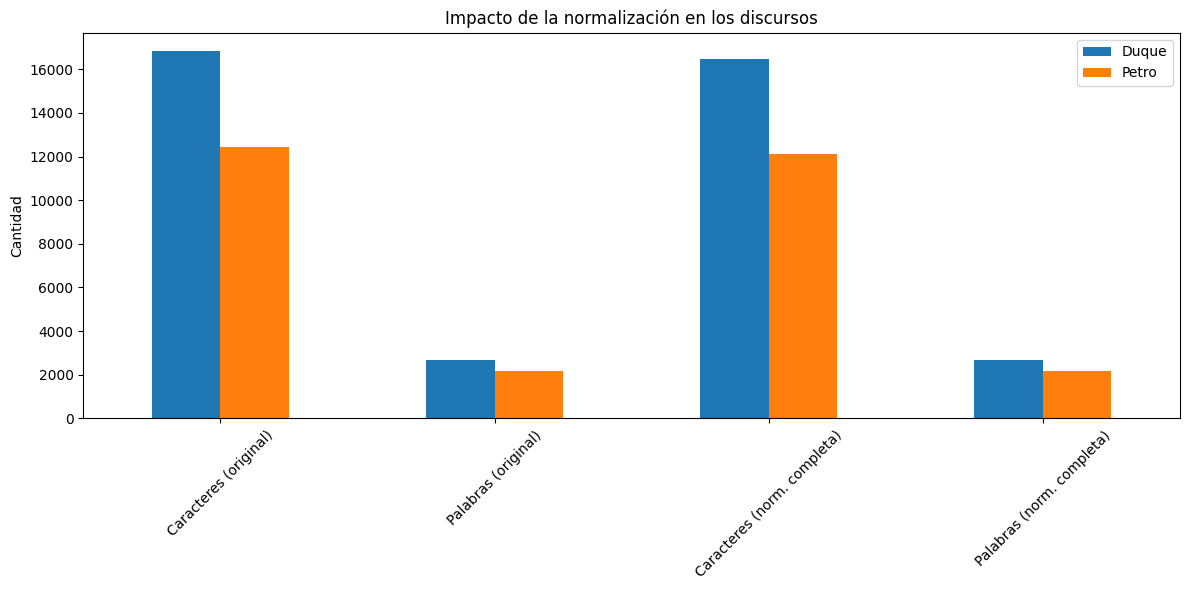

In [ ]:
# Gráfico de barras para comparar
stats_df.plot(kind='bar', figsize=(12, 6))
plt.title('Impacto de la normalización en los discursos')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4.1.4 Consideraciones sobre la normalización

Discutamos los casos en los que podríamos querer conservar ciertos elementos:

In [ ]:
# Ejemplos donde la normalización puede eliminar información relevante
ejemplos_informacion_relevante = [
    "La ONU fue fundada en 1945.",  # Fechas importantes
    "El presidente ENFATIZÓ su punto.",  # Mayúsculas para énfasis
    "Las FARC-EP firmaron el acuerdo de paz.",  # Siglas y entidades
    "El PIB creció un 3,5% en 2022.",  # Porcentajes y cifras
    "@PresidenciaColombia anunció medidas."  # Usuarios de redes sociales
]

In [ ]:
print("Ejemplos donde la normalización puede eliminar información relevante:")
for i, ejemplo in enumerate(ejemplos_informacion_relevante):
    print(f"\nEjemplo {i+1}:")
    print(f"Original: {ejemplo}")
    print(f"Normalizado: {normalizar_texto_completo(ejemplo)}")
    print(f"Información potencialmente perdida: ", end="")

    if i == 0:
        print("Fecha histórica (1945)")
    elif i == 1:
        print("Énfasis en 'ENFATIZÓ' indicado por mayúsculas")
    elif i == 2:
        print("Sigla política con guión (FARC-EP)")
    elif i == 3:
        print("Valores numéricos y porcentaje (3,5%)")
    elif i == 4:
        print("Referencia a cuenta de red social (@PresidenciaColombia)")

Ejemplos donde la normalización puede eliminar información relevante:

Ejemplo 1:
Original: La ONU fue fundada en 1945.
Normalizado: la onu fue fundada en
Información potencialmente perdida: Fecha histórica (1945)

Ejemplo 2:
Original: El presidente ENFATIZÓ su punto.
Normalizado: el presidente enfatizó su punto
Información potencialmente perdida: Énfasis en 'ENFATIZÓ' indicado por mayúsculas

Ejemplo 3:
Original: Las FARC-EP firmaron el acuerdo de paz.
Normalizado: las farcep firmaron el acuerdo de paz
Información potencialmente perdida: Sigla política con guión (FARC-EP)

Ejemplo 4:
Original: El PIB creció un 3,5% en 2022.
Normalizado: el pib creció un en
Información potencialmente perdida: Valores numéricos y porcentaje (3,5%)

Ejemplo 5:
Original: @PresidenciaColombia anunció medidas.
Normalizado: presidenciacolombia anunció medidas
Información potencialmente perdida: Referencia a cuenta de red social (@PresidenciaColombia)


## 4.2 Tokenización

La tokenización es el proceso de dividir el texto en unidades más pequeñas (tokens), generalmente palabras o frases.

### 4.2.1 Tokenización tradicional con NLTK

In [ ]:
# Tokenización básica de frases y palabras con NLTK
def tokenizar_nltk(texto):
    # Tokenizar en frases
    frases = sent_tokenize(texto)

    # Tokenizar cada frase en palabras
    tokens_por_frase = [word_tokenize(frase) for frase in frases]

    # Aplanar la lista de tokens
    tokens = [token for frase in tokens_por_frase for token in frase]

    return frases, tokens

In [ ]:
# Aplicar tokenización a un fragmento de cada discurso
fragmento_duque = ' '.join(discurso_duque.split('\n')[0:3])
fragmento_petro = ' '.join(discurso_petro.split('\n')[0:3])

frases_duque, tokens_duque = tokenizar_nltk(fragmento_duque)
frases_petro, tokens_petro = tokenizar_nltk(fragmento_petro)

In [ ]:
print(f"Fragmento del discurso de Duque:")
print(fragmento_duque)
print(f"\nNúmero de frases: {len(frases_duque)}")
print(f"Primeras 3 frases tokenizadas:")
for i, frase in enumerate(frases_duque[:3]):
    print(f"  Frase {i+1}: {frase}")

print(f"\nNúmero de tokens: {len(tokens_duque)}")
print(f"Primeros 15 tokens: {tokens_duque[:15]}")

print("\n" + "="*80 + "\n")

print(f"Fragmento del discurso de Petro:")
print(fragmento_petro)
print(f"\nNúmero de frases: {len(frases_petro)}")
print(f"Primeras 3 frases tokenizadas:")
for i, frase in enumerate(frases_petro[:3]):
    print(f"  Frase {i+1}: {frase}")

print(f"\nNúmero de tokens: {len(tokens_petro)}")
print(f"Primeros 15 tokens: {tokens_petro[:15]}")

Fragmento del discurso de Duque:
Nos encontramos de nuevo en este foro global que ha sido históricamente un espacio vital para el desarrollo del multilateralismo, la construcción global de la paz y de soluciones a las amenazas de nuestra casa común. Lo hacemos aun en medio de una pandemia cruel que golpea nuestros sistemas de salud, nuestras economías, nuestras conquistas de equidad y el avance de la Agenda 2030. Por encima de cualquier consideración, nos encontramos una vez más en este histórico hemiciclo recordando la fragilidad del ser humano y, al mismo tiempo, reconociendo la grandeza y la condición de una raza humana que sabe sobreponerse a los grandes desafíos. El covid-19 irrumpió de manera abrupta en nuestras vidas. Cambió nuestra cotidianidad, nuestra interacción y nos arrebató seres queridos. Este virus letal ha puesto a prueba nuestras emociones para entender, HOY MÁS QUE NUNCA, cuánto vale el abrazo de un padre y el de una madre, cuánto significa compartir en familia, cuán

### 4.2.2 Tokenización con spaCy


In [ ]:
# Cargar el modelo en español de spaCy
nlp = spacy.load("es_core_news_sm")

def tokenizar_spacy(texto):
    # Procesar el texto con spaCy
    doc = nlp(texto)

    # Extraer frases
    frases = [sent.text for sent in doc.sents]

    # Extraer tokens
    tokens = [token.text for token in doc]

    # Extraer lemas
    lemas = [token.lemma_ for token in doc]

    # Extraer entidades nombradas
    entidades = [(ent.text, ent.label_) for ent in doc.ents]

    return frases, tokens, lemas, entidades

In [ ]:
# Aplicar tokenización de spaCy a los fragmentos
frases_spacy_duque, tokens_spacy_duque, lemas_spacy_duque, entidades_duque = tokenizar_spacy(fragmento_duque)
frases_spacy_petro, tokens_spacy_petro, lemas_spacy_petro, entidades_petro = tokenizar_spacy(fragmento_petro)

In [ ]:
print("Tokenización con spaCy - Fragmento de Duque:")
print(f"Número de frases: {len(frases_spacy_duque)}")
print(f"Número de tokens: {len(tokens_spacy_duque)}")
print(f"Primeros 15 tokens: {tokens_spacy_duque[:15]}")
print("\nEntidades nombradas encontradas:")
for entidad, tipo in entidades_duque:
    print(f"  - '{entidad}' ({tipo})")

print("\n" + "="*80 + "\n")

print("Tokenización con spaCy - Fragmento de Petro:")
print(f"Número de frases: {len(frases_spacy_petro)}")
print(f"Número de tokens: {len(tokens_spacy_petro)}")
print(f"Primeros 15 tokens: {tokens_spacy_petro[:15]}")
print("\nEntidades nombradas encontradas:")
for entidad, tipo in entidades_petro:
    print(f"  - '{entidad}' ({tipo})")

Tokenización con spaCy - Fragmento de Duque:
Número de frases: 6
Número de tokens: 180
Primeros 15 tokens: ['Nos', 'encontramos', 'de', 'nuevo', 'en', 'este', 'foro', 'global', 'que', 'ha', 'sido', 'históricamente', 'un', 'espacio', 'vital']

Entidades nombradas encontradas:
  - 'Lo hacemos aun en medio de una pandemia cruel' (MISC)
  - 'Agenda 2030' (MISC)
  - 'Cambió' (LOC)
  - 'arrebató seres' (PER)
  - 'NUNCA' (ORG)


Tokenización con spaCy - Fragmento de Petro:
Número de frases: 6
Número de tokens: 94
Primeros 15 tokens: ['Vengo', 'de', 'uno', 'de', 'los', 'tres', 'países', 'más', 'bellos', 'de', 'la', 'Tierra', '.', 'Allí', 'hay']

Entidades nombradas encontradas:
  - 'Vengo' (LOC)
  - 'la Tierra' (LOC)
  - 'Allí' (LOC)
  - 'Miles de especies multicolores' (MISC)
  - 'Allí' (PER)
  - 'Vengo' (LOC)
  - 'Mi país no solo es bello' (MISC)


### 4.2.3 Tokenización con modelos de Hugging Face

In [ ]:
# Cargar tokenizadores de Hugging Face para español
tokenizador_bert = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")
tokenizador_roberta = AutoTokenizer.from_pretrained("PlanTL-GOB-ES/roberta-base-bne")

In [ ]:
def tokenizar_transformers(texto, tokenizador, mostrar_ids=False):
    # Tokenizar con el modelo de Hugging Face
    tokens = tokenizador.tokenize(texto)

    if mostrar_ids:
        # Obtener los IDs de los tokens
        inputs = tokenizador(texto, return_tensors="pt")
        token_ids = inputs["input_ids"][0].tolist()
        return tokens, token_ids
    else:
        return tokens

In [ ]:
# Aplicar tokenización con modelos transformers a fragmentos más cortos
muestra_duque = discurso_duque.split('\n')[0]
muestra_petro = discurso_petro.split('\n')[0]

print("Fragmento más corto de Duque:")
print(muestra_duque)
tokens_bert_duque = tokenizar_transformers(muestra_duque, tokenizador_bert)
tokens_roberta_duque = tokenizar_transformers(muestra_duque, tokenizador_roberta)

print("\nTokenización con BERT:")
print(f"Número de tokens: {len(tokens_bert_duque)}")
print(f"Tokens: {tokens_bert_duque}")

print("\nTokenización con RoBERTa:")
print(f"Número de tokens: {len(tokens_roberta_duque)}")
print(f"Tokens: {tokens_roberta_duque}")

print("\n" + "="*80 + "\n")

print("Fragmento más corto de Petro:")
print(muestra_petro)
tokens_bert_petro = tokenizar_transformers(muestra_petro, tokenizador_bert)
tokens_roberta_petro = tokenizar_transformers(muestra_petro, tokenizador_roberta)

print("\nTokenización con BERT:")
print(f"Número de tokens: {len(tokens_bert_petro)}")
print(f"Tokens: {tokens_bert_petro}")

print("\nTokenización con RoBERTa:")
print(f"Número de tokens: {len(tokens_roberta_petro)}")
print(f"Tokens: {tokens_roberta_petro}")

### 4.2.4 Comparación de tokenizadores

In [ ]:
# Función para comparar resultados de tokenización para un ejemplo
def comparar_tokenizadores(texto, titulo="Comparación de tokenizadores"):
    # NLTK
    _, tokens_nltk = tokenizar_nltk(texto)

    # spaCy
    _, tokens_spacy, _, _ = tokenizar_spacy(texto)

    # BERT
    tokens_bert = tokenizar_transformers(texto, tokenizador_bert)

    # RoBERTa
    tokens_roberta = tokenizar_transformers(texto, tokenizador_roberta)

    # Crear un DataFrame para comparar
    comparacion = pd.DataFrame({
        'Tokenizador': ['NLTK', 'spaCy', 'BERT', 'RoBERTa'],
        'Número de tokens': [len(tokens_nltk), len(tokens_spacy), len(tokens_bert), len(tokens_roberta)]
    })

    # Mostrar comparación
    print(f"\n{titulo}")
    print(comparacion)

    # Visualizar
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Tokenizador', y='Número de tokens', data=comparacion)
    plt.title(titulo)
    plt.xlabel('Tokenizador')
    plt.ylabel('Número de tokens')
    plt.tight_layout()
    plt.show()

    return comparacion

In [ ]:
# Ejemplos específicos para mostrar diferencias entre tokenizadores
ejemplos_tokenizacion = [
    "Las Naciones Unidas defienden la paz mundial.",
    "El acuerdo de paz con las FARC-EP fue histórico.",
    "La biodiversidad en Colombia es extraordinaria.",
    "El COVID-19 generó una crisis económica global.",
    "narcodictadura, narcoterrorista, latinoamericanos"  # Palabras compuestas
]

In [ ]:
for i, ejemplo in enumerate(ejemplos_tokenizacion):
    comparar_tokenizadores(ejemplo, f"Ejemplo {i+1}: {ejemplo}")

### 4.2.5 Tokenización de palabras compuestas y fuera del vocabulario (OOV)

In [ ]:
# Palabras que pueden ser desafiantes para los tokenizadores
palabras_complejas = [
    "narcodictadura",  # Usado por Duque
    "latinoamericanos",
    "COVID-19",
    "antirrevolucionario",
    "narco-economía",
    "TikTok"  # Palabra moderna
]

In [ ]:
print("Análisis de tokenización para palabras complejas:\n")

for palabra in palabras_complejas:
    print(f"Palabra: '{palabra}'")

    # NLTK
    _, tokens_nltk = tokenizar_nltk(palabra)
    print(f"  NLTK: {tokens_nltk}")

    # spaCy
    _, tokens_spacy, _, _ = tokenizar_spacy(palabra)
    print(f"  spaCy: {tokens_spacy}")

    # BERT
    tokens_bert = tokenizar_transformers(palabra, tokenizador_bert)
    print(f"  BERT: {tokens_bert}")

    # RoBERTa
    tokens_roberta = tokenizar_transformers(palabra, tokenizador_roberta)
    print(f"  RoBERTa: {tokens_roberta}")

    print()

### 4.2.6 Aplicación a los discursos completos

In [ ]:
# Tokenizar los discursos completos para análisis
_, tokens_nltk_duque = tokenizar_nltk(discurso_duque)
_, tokens_nltk_petro = tokenizar_nltk(discurso_petro)

_, tokens_spacy_duque, _, _ = tokenizar_spacy(discurso_duque)
_, tokens_spacy_petro, _, _ = tokenizar_spacy(discurso_petro)

In [ ]:
# Contar tokens y tipos (tokens únicos)
stats_tokens = pd.DataFrame({
    'Discurso': ['Duque', 'Duque', 'Petro', 'Petro'],
    'Tokenizador': ['NLTK', 'spaCy', 'NLTK', 'spaCy'],
    'Total de tokens': [len(tokens_nltk_duque), len(tokens_spacy_duque),
                       len(tokens_nltk_petro), len(tokens_spacy_petro)],
    'Tokens únicos': [len(set(tokens_nltk_duque)), len(set(tokens_spacy_duque)),
                     len(set(tokens_nltk_petro)), len(set(tokens_spacy_petro))]
})

NameError: name 'tokens_nltk_duque' is not defined

In [ ]:
# Mostrar estadísticas
print("Estadísticas de tokenización para discursos completos:")
print(stats_tokens)

In [ ]:
# Visualizar
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Discurso', y='Total de tokens', hue='Tokenizador', data=stats_tokens)
plt.title('Total de tokens por discurso')
plt.ylabel('Cantidad')

plt.subplot(1, 2, 2)
sns.barplot(x='Discurso', y='Tokens únicos', hue='Tokenizador', data=stats_tokens)
plt.title('Tokens únicos por discurso')
plt.ylabel('Cantidad')

plt.tight_layout()
plt.show()

## 4.3 Eliminación de Stopwords (Palabras vacías)

Las stopwords son palabras comunes (como artículos, preposiciones) que generalmente no aportan significado importante para el análisis.

### 4.3.1 Stopwords en español


In [ ]:
# Cargar stopwords en español
stop_words_nltk = set(stopwords.words('spanish'))
print(f"NLTK tiene {len(stop_words_nltk)} stopwords en español")
print(f"Ejemplos de stopwords: {list(stop_words_nltk)[:20]}")

# También podemos usar las stopwords de spaCy
stop_words_spacy = spacy.lang.es.stop_words.STOP_WORDS
print(f"\nspaCy tiene {len(stop_words_spacy)} stopwords en español")
print(f"Ejemplos de stopwords: {list(stop_words_spacy)[:20]}")

In [ ]:
# Comparar las listas
nltk_no_spacy = stop_words_nltk - stop_words_spacy
spacy_no_nltk = stop_words_spacy - stop_words_nltk

print(f"\nPalabras en NLTK pero no en spaCy: {len(nltk_no_spacy)}")
print(f"Ejemplos: {list(nltk_no_spacy)[:10]}")

print(f"\nPalabras en spaCy pero no en NLTK: {len(spacy_no_nltk)}")
print(f"Ejemplos: {list(spacy_no_nltk)[:10]}")

### 4.3.2 Filtrado de stopwords

In [ ]:
def eliminar_stopwords(tokens, stop_words):
    """Elimina stopwords de una lista de tokens"""
    return [token for token in tokens if token.lower() not in stop_words]

In [ ]:
# Aplicar a nuestros discursos tokenizados
tokens_duque_sin_stop = eliminar_stopwords(tokens_nltk_duque, stop_words_nltk)
tokens_petro_sin_stop = eliminar_stopwords(tokens_nltk_petro, stop_words_nltk)

In [ ]:
# Comparar antes y después
print("Discurso de Duque:")
print(f"Tokens originales: {len(tokens_nltk_duque)}")
print(f"Tokens sin stopwords: {len(tokens_duque_sin_stop)}")
print(f"Reducción: {len(tokens_nltk_duque) - len(tokens_duque_sin_stop)} tokens ({(1 - len(tokens_duque_sin_stop)/len(tokens_nltk_duque))*100:.1f}%)")

print("\nDiscurso de Petro:")
print(f"Tokens originales: {len(tokens_nltk_petro)}")
print(f"Tokens sin stopwords: {len(tokens_petro_sin_stop)}")
print(f"Reducción: {len(tokens_nltk_petro) - len(tokens_petro_sin_stop)} tokens ({(1 - len(tokens_petro_sin_stop)/len(tokens_nltk_petro))*100:.1f}%)")

In [ ]:
# Visualización
datos_stop = pd.DataFrame({
    'Discurso': ['Duque', 'Duque', 'Petro', 'Petro'],
    'Tipo': ['Con stopwords', 'Sin stopwords', 'Con stopwords', 'Sin stopwords'],
    'Cantidad': [len(tokens_nltk_duque), len(tokens_duque_sin_stop),
                len(tokens_nltk_petro), len(tokens_petro_sin_stop)]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Discurso', y='Cantidad', hue='Tipo', data=datos_stop)
plt.title('Impacto de la eliminación de stopwords')
plt.ylabel('Número de tokens')
plt.tight_layout()
plt.show()

### 4.3.3 Análisis de las palabras más frecuentes

In [ ]:
def palabras_frecuentes(tokens, n=20):
    """Encuentra las palabras más frecuentes en una lista de tokens"""
    contador = Counter(token.lower() for token in tokens)
    return contador.most_common(n)

In [ ]:
# Con stopwords
print("Palabras más frecuentes (con stopwords):")
print("\nDiscurso de Duque:")
for palabra, frecuencia in palabras_frecuentes(tokens_nltk_duque):
    print(f"  {palabra}: {frecuencia}")

print("\nDiscurso de Petro:")
for palabra, frecuencia in palabras_frecuentes(tokens_nltk_petro):
    print(f"  {palabra}: {frecuencia}")

In [ ]:
# Sin stopwords
print("\nPalabras más frecuentes (sin stopwords):")
print("\nDiscurso de Duque:")
for palabra, frecuencia in palabras_frecuentes(tokens_duque_sin_stop):
    print(f"  {palabra}: {frecuencia}")

print("\nDiscurso de Petro:")
for palabra, frecuencia in palabras_frecuentes(tokens_petro_sin_stop):
    print(f"  {palabra}: {frecuencia}")

In [ ]:
# Visualización de las palabras más frecuentes sin stopwords
def plot_frecuencias(tokens, titulo, n=15):
    contador = Counter(token.lower() for token in tokens)
    palabras, frecuencias = zip(*contador.most_common(n))

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(palabras), y=list(frecuencias))
    plt.title(titulo)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Palabras')
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

In [ ]:
plot_frecuencias(tokens_duque_sin_stop, 'Palabras más frecuentes en el discurso de Duque (sin stopwords)')
plot_frecuencias(tokens_petro_sin_stop, 'Palabras más frecuentes en el discurso de Petro (sin stopwords)')

### 4.3.4 Stopwords personalizadas para análisis político

In [ ]:
# Podemos definir stopwords adicionales específicas para análisis político
stopwords_politicas = {
    'señores', 'señoras', 'además', 'mediante', 'asimismo', 'través',
    'sr', 'sra', 'don', 'doña', 'dr', 'dra', 'etc', 'modo'
}

In [ ]:
# Combinar con las stopwords estándar
stop_words_combinadas = stop_words_nltk.union(stopwords_politicas)

In [ ]:
# Aplicar a nuestros discursos
tokens_duque_stop_pol = eliminar_stopwords(tokens_nltk_duque, stop_words_combinadas)
tokens_petro_stop_pol = eliminar_stopwords(tokens_nltk_petro, stop_words_combinadas)

In [ ]:
# Ver las diferencias
print("Impacto de las stopwords políticas adicionales:")
print(f"Duque - Tokens con stopwords estándar: {len(tokens_duque_sin_stop)}")
print(f"Duque - Tokens con stopwords personalizadas: {len(tokens_duque_stop_pol)}")
print(f"Diferencia: {len(tokens_duque_sin_stop) - len(tokens_duque_stop_pol)} tokens")

print(f"\nPetro - Tokens con stopwords estándar: {len(tokens_petro_sin_stop)}")
print(f"Petro - Tokens con stopwords personalizadas: {len(tokens_petro_stop_pol)}")
print(f"Diferencia: {len(tokens_petro_sin_stop) - len(tokens_petro_stop_pol)} tokens")

In [ ]:
# Comparar las palabras más frecuentes con las nuevas stopwords
print("\nPalabras más frecuentes (con stopwords personalizadas):")
print("\nDiscurso de Duque:")
for palabra, frecuencia in palabras_frecuentes(tokens_duque_stop_pol):
    print(f"  {palabra}: {frecuencia}")

print("\nDiscurso de Petro:")
for palabra, frecuencia in palabras_frecuentes(tokens_petro_stop_pol):
    print(f"  {palabra}: {frecuencia}")

## 4.4 Stemming vs Lematización

El stemming reduce las palabras a su raíz mediante reglas simples de eliminación de sufijos, mientras que la lematización reduce las palabras a su forma base (lema) utilizando análisis morfológico y diccionarios.

### 4.4.1 Stemming con NLTK

In [ ]:
# Inicializar stemmers
stemmer_porter = PorterStemmer()
stemmer_snowball = SnowballStemmer('spanish')  # Específico para español

def aplicar_stemming(tokens, stemmer):
    """Aplica stemming a una lista de tokens"""
    return [stemmer.stem(token) for token in tokens]

In [ ]:
# Ejemplos con palabras en español
ejemplos_stemming = [
    "democracia", "democrático", "democratización",
    "política", "político", "políticas",
    "gobernar", "gobierno", "gobernante", "gobernación",
    "paz", "pacífico", "pacificación",
    "economía", "económico", "económicamente"
]

In [ ]:
# Comparar resultados de distintos stemmers
resultados_stemming = []

for palabra in ejemplos_stemming:
    stem_porter = stemmer_porter.stem(palabra)
    stem_snowball = stemmer_snowball.stem(palabra)

    resultados_stemming.append({
        'Palabra': palabra,
        'Porter Stemmer': stem_porter,
        'Snowball Stemmer (Español)': stem_snowball
    })

In [ ]:
# Mostrar resultados
df_stemming = pd.DataFrame(resultados_stemming)
print("Comparación de stemmers:")
print(df_stemming)

Comparación de stemmers:
            Palabra   Porter Stemmer Snowball Stemmer (Español)
0        democracia       democracia                  democraci
1       democrático      democrático                   democrat
2   democratización  democratización                 democratiz
3          política         política                      polit
4          político         político                      polit
5         políticas         política                      polit
6          gobernar         gobernar                     gobern
7          gobierno         gobierno                    gobiern
8        gobernante        gobernant                     gobern
9       gobernación      gobernación                     gobern
10              paz              paz                        paz
11         pacífico         pacífico                      pacif
12     pacificación     pacificación                      pacif
13         economía         economía                     econom
14        econó

In [ ]:
# Aplicar a una muestra de los discursos
muestra_duque = tokens_nltk_duque[:100]  # Primeros 100 tokens
muestra_petro = tokens_nltk_petro[:100]

stems_duque_snowball = aplicar_stemming(muestra_duque, stemmer_snowball)
stems_petro_snowball = aplicar_stemming(muestra_petro, stemmer_snowball)

print("\nEjemplo de stemming en el discurso de Duque:")
for original, stem in zip(muestra_duque[:15], stems_duque_snowball[:15]):
    print(f"  {original} -> {stem}")

print("\nEjemplo de stemming en el discurso de Petro:")
for original, stem in zip(muestra_petro[:15], stems_petro_snowball[:15]):
    print(f"  {original} -> {stem}")

### 4.4.2 Lematización

In [ ]:
# Inicializar lematizador de NLTK (para inglés)
lemmatizer_nltk = WordNetLemmatizer()

In [ ]:
# Para español usaremos spaCy que tiene mejor soporte
def lematizar_spacy(tokens, texto_completo=None):
    """
    Lematiza tokens usando spaCy
    Si se proporciona el texto_completo, procesa el texto entero (mejor contexto)
    Si no, procesa cada token individualmente (menos preciso)
    """
    if texto_completo:
        # Procesar el texto completo para mantener el contexto
        doc = nlp(texto_completo)
        # Extraer lemas manteniendo el orden original
        lemas = [token.lemma_ for token in doc]
        return lemas
    else:
        # Procesar cada token individualmente (menos preciso)
        return [nlp(token)[0].lemma_ for token in tokens]

In [ ]:
# Comparar stemming vs lematización con ejemplos
ejemplos_comparacion = [
    "políticas", "gobiernos", "ciudadanas",
    "económicas", "sociales", "latinoamericanos",
    "mejores", "peores", "fui", "hicieron"
]

In [ ]:
resultados_comparacion = []

for palabra in ejemplos_comparacion:
    doc = nlp(palabra)  # Procesar con spaCy
    lema = doc[0].lemma_
    stem = stemmer_snowball.stem(palabra)

    resultados_comparacion.append({
        'Palabra': palabra,
        'Lema (spaCy)': lema,
        'Stem (Snowball)': stem
    })

In [ ]:
# Mostrar resultados
df_comparacion = pd.DataFrame(resultados_comparacion)
print("Comparación entre stemming y lematización:")
print(df_comparacion)

Comparación entre stemming y lematización:
            Palabra     Lema (spaCy) Stem (Snowball)
0         políticas         política           polit
1         gobiernos         gobierno            gobi
2        ciudadanas        ciudadana        ciudadan
3        económicas        económico          econom
4          sociales           social          social
5  latinoamericanos  latinoamericano  latinoamerican
6           mejores            mejor           mejor
7            peores             peor            peor
8               fui               ir             fui
9          hicieron            hacer             hic


In [ ]:
# Aplicar a muestras de los discursos
lemas_duque = lematizar_spacy(tokens_nltk_duque[:100], ' '.join(tokens_nltk_duque[:100]))
lemas_petro = lematizar_spacy(tokens_nltk_petro[:100], ' '.join(tokens_nltk_petro[:100]))

print("\nEjemplo de lematización en el discurso de Duque:")
for original, lema in zip(muestra_duque[:15], lemas_duque[:15]):
    print(f"  {original} -> {lema}")

print("\nEjemplo de lematización en el discurso de Petro:")
for original, lema in zip(muestra_petro[:15], lemas_petro[:15]):
    print(f"  {original} -> {lema}")

### 4.4.3 Casos especiales y diferencias importantes

In [ ]:
# Palabras donde stemming y lematización difieren significativamente
casos_especiales = [
    "soy", "fui", "seré",  # Formas del verbo ser
    "voy", "iré", "fue",   # Formas del verbo ir
    "mejor", "óptimo",     # Comparativos/superlativos
    "dijeron", "dijo",     # Verbos irregulares
    "ciudades", "ciudadanos", # Misma raíz, diferente significado
    "política", "políticos", "politización"  # Términos relacionados política
]

In [ ]:
resultados_especiales = []

for palabra in casos_especiales:
    doc = nlp(palabra)
    lema = doc[0].lemma_
    stem = stemmer_snowball.stem(palabra)

    resultados_especiales.append({
        'Palabra': palabra,
        'Lema (spaCy)': lema,
        'Stem (Snowball)': stem,
        'Observación': ''  # Completaremos esto manualmente
    })

In [ ]:
# Añadir observaciones manualmente
resultados_especiales[0]['Observación'] = 'Verbo ser: lematización mantiene el significado'
resultados_especiales[1]['Observación'] = 'Verbo ser: stemming pierde la conjugación'
resultados_especiales[2]['Observación'] = 'Verbo ser: stemming no reconoce la relación'
resultados_especiales[3]['Observación'] = 'Verbo ir: lematización identifica correctamente'
resultados_especiales[4]['Observación'] = 'Verbo ir: stemming no reconoce la relación'
resultados_especiales[5]['Observación'] = 'Verbo ir: stemming no reconoce la relación'
resultados_especiales[6]['Observación'] = 'Adjetivo: lematización normaliza al positivo'
resultados_especiales[7]['Observación'] = 'Adjetivo: lematización normaliza al positivo'
resultados_especiales[8]['Observación'] = 'Verbo irregular: lematización identifica la raíz'
resultados_especiales[9]['Observación'] = 'Verbo irregular: lematización mantiene consistencia'
resultados_especiales[10]['Observación'] = 'Sustantivo: lematización mantiene significado'
resultados_especiales[11]['Observación'] = 'Sustantivo relacionado: lematizado correctamente'
resultados_especiales[12]['Observación'] = 'Término político: lematización mantiene categoría'
resultados_especiales[13]['Observación'] = 'Término político: lematización distingue persona'
resultados_especiales[14]['Observación'] = 'Término político: lematización distingue proceso'

In [ ]:
# Mostrar resultados
df_especiales = pd.DataFrame(resultados_especiales)
print("Casos especiales donde stemming y lematización difieren:")
print(df_especiales[['Palabra', 'Lema (spaCy)', 'Stem (Snowball)', 'Observación']])

Casos especiales donde stemming y lematización difieren:
         Palabra  Lema (spaCy) Stem (Snowball)  \
0            soy           ser             soy   
1            fui            ir             fui   
2           seré           ser             ser   
3            voy            ir             voy   
4            iré            ir             ire   
5            fue           ser             fue   
6          mejor         mejor           mejor   
7         óptimo        óptimo           optim   
8        dijeron         decir         dijeron   
9           dijo         decir             dij   
10      ciudades        ciudad          ciudad   
11    ciudadanos     ciudadano        ciudadan   
12      política      político           polit   
13     políticos      político           polit   
14  politización  politización         politiz   

                                          Observación  
0     Verbo ser: lematización mantiene el significado  
1           Verbo ser: stemmin

### 4.4.4 Implicaciones para el análisis de discursos políticos


In [ ]:
# Procesamiento completo de los discursos
doc_duque = nlp(discurso_duque)
doc_petro = nlp(discurso_petro)

# Obtener lemas para cada discurso completo
lemas_completos_duque = [token.lemma_ for token in doc_duque]
lemas_completos_petro = [token.lemma_ for token in doc_petro]

# Obtener stems para cada discurso completo
stems_completos_duque = aplicar_stemming(tokens_nltk_duque, stemmer_snowball)
stems_completos_petro = aplicar_stemming(tokens_nltk_petro, stemmer_snowball)

# Comparar vocabulario (tokens únicos) después de cada proceso
vocab_original_duque = set(token.lower() for token in tokens_nltk_duque)
vocab_original_petro = set(token.lower() for token in tokens_nltk_petro)

vocab_stems_duque = set(stems_completos_duque)
vocab_stems_petro = set(stems_completos_petro)

vocab_lemas_duque = set(lemas_completos_duque)
vocab_lemas_petro = set(lemas_completos_petro)

NameError: name 'tokens_nltk_duque' is not defined

In [ ]:
# Estadísticas de reducción de vocabulario
stats_reduccion = pd.DataFrame({
    'Discurso': ['Duque', 'Duque', 'Duque', 'Petro', 'Petro', 'Petro'],
    'Procesamiento': ['Original', 'Stemming', 'Lematización',
                     'Original', 'Stemming', 'Lematización'],
    'Vocabulario (tokens únicos)': [
        len(vocab_original_duque), len(vocab_stems_duque), len(vocab_lemas_duque),
        len(vocab_original_petro), len(vocab_stems_petro), len(vocab_lemas_petro)
    ]
})

print("Reducción de vocabulario por procesamiento:")
print(stats_reduccion)

In [ ]:
# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(x='Discurso', y='Vocabulario (tokens únicos)',
           hue='Procesamiento', data=stats_reduccion)
plt.title('Impacto del stemming y lematización en el tamaño del vocabulario')
plt.ylabel('Número de tokens únicos')
plt.tight_layout()
plt.show()

In [ ]:
# Análisis de frecuencia después de lematización y eliminación de stopwords
lemas_sin_stop_duque = [lema for lema in lemas_completos_duque
                        if lema.lower() not in stop_words_nltk]
lemas_sin_stop_petro = [lema for lema in lemas_completos_petro
                       if lema.lower() not in stop_words_nltk]

print("\nPalabras más frecuentes tras lematización (sin stopwords):")
print("\nDiscurso de Duque:")
for palabra, frecuencia in Counter(lemas_sin_stop_duque).most_common(15):
    print(f"  {palabra}: {frecuencia}")

print("\nDiscurso de Petro:")
for palabra, frecuencia in Counter(lemas_sin_stop_petro).most_common(15):
    print(f"  {palabra}: {frecuencia}")


### 4.4.5 Cuándo usar stemming vs lematización

La elección entre stemming y lematización depende de varios factores:

**Ventajas del stemming:**
- Más rápido computacionalmente
- No requiere diccionarios lingüísticos
- Puede funcionar con palabras desconocidas
- Reduce más agresivamente el vocabulario

**Ventajas de la lematización:**
- Mayor precisión lingüística
- Preserva significados distintos
- Mejores resultados para análisis semántico
- Especialmente útil para idiomas con morfología compleja

**Recomendaciones para análisis de discurso político:**
- **Usar lematización cuando:**
  - Se necesita alta precisión lingüística
  - El análisis enfoca aspectos semánticos
  - Se analizan verbos y sus significados
  - Se dispone de suficientes recursos computacionales

- **Usar stemming cuando:**
  - Se necesita eficiencia computacional
  - El corpus es muy grande
  - La pérdida de precisión no es crítica
  - Se busca agrupar palabras de manera más amplia

Para análisis de discursos políticos en español, donde los matices y precisión son importantes, la lematización suele ser preferible.


## 4.5 Visualización con nubes de palabras

Las nubes de palabras son una técnica de visualización donde el tamaño de cada palabra es proporcional a su frecuencia en el texto. Son útiles para identificar términos prominentes en un corpus de manera visual e intuitiva.


### 4.5.1 Creación de nubes de palabras básicas

In [ ]:
def generar_nube_palabras(tokens, titulo, max_words=100, figsize=(12, 8)):
    # Convertir tokens a texto para WordCloud
    texto = ' '.join(tokens)

    # Crear la nube de palabras
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=max_words,
        contour_width=3,
        contour_color='steelblue',
        collocations=False,  # No incluir bigramas
        random_state=42
    ).generate(texto)

    # Mostrar la nube de palabras
    plt.figure(figsize=figsize)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo, fontsize=16)
    plt.tight_layout()
    plt.show()

In [ ]:
# Filtrar stopwords y aplicar lematización para mejores resultados
lemas_filtrados_duque = [lema for lema in lemas_completos_duque
                        if lema.lower() not in stop_words_combinadas
                        and len(lema) > 1]  # Evitar caracteres sueltos

lemas_filtrados_petro = [lema for lema in lemas_completos_petro
                        if lema.lower() not in stop_words_combinadas
                        and len(lema) > 1]

In [ ]:
# Generar nubes de palabras
generar_nube_palabras(
    lemas_filtrados_duque,
    'Nube de palabras del discurso de Duque'
)

generar_nube_palabras(
    lemas_filtrados_petro,
    'Nube de palabras del discurso de Petro'
)

### 4.5.2 Personalización de nubes de palabras

Podemos personalizar las nubes de palabras para resaltar aspectos específicos o mejorar la visualización:

In [ ]:
# Nube de palabras con diferentes parámetros
# Podemos modificar colores o restringir más las palabras
def nube_palabras_tematica(tokens, stopwords_adicionales, titulo,
                          colormap='viridis', max_words=75):
    # Filtrar stopwords adicionales
    tokens_filtrados = [token for token in tokens
                       if token.lower() not in stopwords_adicionales]

    # Convertir tokens a texto
    texto = ' '.join(tokens_filtrados)

    # Crear nube con colores personalizados
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=max_words,
        colormap=colormap,
        contour_width=2,
        contour_color='gray',
        collocations=False,
        random_state=42
    ).generate(texto)

    # Mostrar la nube
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo, fontsize=16)
    plt.tight_layout()
    plt.show()

# Stopwords temáticas adicionales para destacar términos más específicos
stopwords_tematicas = stop_words_combinadas.union({
    'país', 'colombia', 'colombiano', 'colombiana', 'colombianos', 'colombianas',
    'mundo', 'gran', 'podemos', 'hacer', 'decir', 'tres', 'mil', 'dos',
    'año', 'años', 'vez', 'ser', 'tener', 'todo', 'todos', 'todas'
})

# Nubes temáticas con colores diferentes
nube_palabras_tematica(
    lemas_filtrados_duque,
    stopwords_tematicas,
    'Términos clave del discurso de Duque',
    colormap='Blues'
)

nube_palabras_tematica(
    lemas_filtrados_petro,
    stopwords_tematicas,
    'Términos clave del discurso de Petro',
    colormap='Reds'
)

### 4.5.3 Nubes de palabras para categorías específicas

Podemos generar nubes para categorías temáticas específicas:

In [ ]:
# Definir categorías temáticas
categorias = {
    'Economía': ['economía', 'fiscal', 'económico', 'financiero', 'crecimiento',
                'desarrollo', 'inversión', 'PIB', 'comercio', 'mercado', 'empleo',
                'presupuesto', 'inflación', 'impuesto', 'ingreso', 'pobreza', 'riqueza'],

    'Medio ambiente': ['ambiente', 'selva', 'bosque', 'climático', 'naturaleza',
                      'amazonas', 'biodiversidad', 'sostenible', 'contaminación',
                      'carbono', 'petróleo', 'CO2', 'agua', 'verde', 'oxígeno'],

    'Seguridad': ['paz', 'seguridad', 'violencia', 'conflicto', 'guerra', 'narco',
                 'terrorismo', 'crimen', 'delito', 'arma', 'militar', 'policía',
                 'defensa', 'amenaza', 'ataque', 'combate', 'víctima'],

    'Instituciones': ['democracia', 'institución', 'Estado', 'gobierno', 'derecho',
                     'ley', 'justicia', 'constitución', 'legal', 'política', 'político',
                     'congreso', 'parlamento', 'presidencia', 'ministerio', 'público']
}

def nube_categorias(tokens, categoria, palabras_categoria, titulo):
    # Filtrar solo tokens que pertenecen a la categoría
    tokens_categoria = [token for token in tokens
                       if any(palabra in token.lower() for palabra in palabras_categoria)]

    # Verificar si hay tokens en la categoría
    if len(tokens_categoria) < 5:
        print(f"No hay suficientes tokens para la categoría '{categoria}'")
        return

    # Generar nube de palabras específica
    texto_categoria = ' '.join(tokens_categoria)

    # Seleccionar colormap según categoría
    colormaps = {
        'Economía': 'Greens',
        'Medio ambiente': 'YlGn',
        'Seguridad': 'Reds',
        'Instituciones': 'Blues'
    }

    # Crear y mostrar la nube
    wordcloud = WordCloud(
        width=600,
        height=300,
        background_color='white',
        max_words=50,
        colormap=colormaps.get(categoria, 'viridis'),
        contour_width=1,
        contour_color='gray',
        collocations=False
    ).generate(texto_categoria)

    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{titulo} - Categoría: {categoria}", fontsize=14)
    plt.tight_layout()
    plt.show()

    # Retornar cantidad de tokens
    return len(tokens_categoria)

# Aplicar a ambos discursos
for categoria, palabras in categorias.items():
    print(f"\nAnálisis de categoría: {categoria}")

    cantidad_duque = nube_categorias(
        lemas_completos_duque,
        categoria,
        palabras,
        "Discurso de Duque"
    )

    cantidad_petro = nube_categorias(
        lemas_completos_petro,
        categoria,
        palabras,
        "Discurso de Petro"
    )

    if cantidad_duque and cantidad_petro:
        print(f"Duque: {cantidad_duque} tokens | Petro: {cantidad_petro} tokens")

### 4.5.4 Nubes de palabras comparativas

Podemos crear visualizaciones que comparen directamente ambos discursos:

In [ ]:
def nube_comparativa(tokens1, nombre1, tokens2, nombre2, titulo):
    # Contar frecuencias
    contador1 = Counter(tokens1)
    contador2 = Counter(tokens2)

    # Crear diccionario para WordCloud
    # Valor positivo = frecuencia en tokens1, Valor negativo = frecuencia en tokens2
    freq_comparativa = {}

    # Todos los tokens del primer conjunto (valores positivos)
    for token, freq in contador1.items():
        if token not in freq_comparativa:
            freq_comparativa[token] = freq
        else:
            freq_comparativa[token] += freq

    # Todos los tokens del segundo conjunto (valores negativos)
    for token, freq in contador2.items():
        if token not in freq_comparativa:
            freq_comparativa[token] = -freq
        else:
            freq_comparativa[token] -= freq

    # Separar en dos conjuntos para visualización
    palabras_1 = {token: freq for token, freq in freq_comparativa.items() if freq > 0}
    palabras_2 = {token: abs(freq) for token, freq in freq_comparativa.items() if freq < 0}

    # Crear las nubes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

    # Nube para el primer conjunto
    wordcloud1 = WordCloud(
        width=600, height=300,
        background_color='white',
        colormap='Blues',
        max_words=75
    ).generate_from_frequencies(palabras_1)

    ax1.imshow(wordcloud1, interpolation='bilinear')
    ax1.axis('off')
    ax1.set_title(f"Palabras distintivas de {nombre1}", fontsize=14)

    # Nube para el segundo conjunto
    wordcloud2 = WordCloud(
        width=600, height=300,
        background_color='white',
        colormap='Reds',
        max_words=75
    ).generate_from_frequencies(palabras_2)

    ax2.imshow(wordcloud2, interpolation='bilinear')
    ax2.axis('off')
    ax2.set_title(f"Palabras distintivas de {nombre2}", fontsize=14)

    plt.suptitle(titulo, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste para el título superior
    plt.show()

# Aplicar a nuestros discursos (usando lemas filtrados)
nube_comparativa(
    lemas_filtrados_duque, "Duque",
    lemas_filtrados_petro, "Petro",
    "Comparación de palabras distintivas entre Duque y Petro"
)

### 5.5 Interpretación de nubes de palabras para análisis de discurso político

Las nubes de palabras nos permiten identificar rápidamente los términos más frecuentes y, por tanto, los posibles temas centrales de cada discurso. Sin embargo, es importante considerar:

1. **Limitaciones**: Las nubes de palabras no consideran el contexto ni las relaciones entre términos.
2. **Complementariedad**: Deben utilizarse junto con análisis cuantitativos más detallados.
3. **Subjetividad**: La selección de stopwords y filtros puede afectar significativamente los resultados.
4. **Valor exploratorio**: Son excelentes para una primera aproximación al texto y para comunicar resultados.

Para el análisis de discurso político, podemos observar:
- Cuáles son los términos centrales de cada orador
- Qué campos semánticos predominan
- Diferencias significativas entre distintos hablantes
- Evolución del discurso a lo largo del tiempo (si se analizan varios discursos)